In [59]:
import pandas as pd
import numpy as np

TEST_PATH = 'test.xlsx'  # ← 改成你的路径
CITY_PATH = 'city.xlsx'  # ← 改成你的路径

# 读取数据
test = pd.read_excel(TEST_PATH)
city = pd.read_excel(CITY_PATH)

# 确保日期列为 datetime 格式
test['date'] = pd.to_datetime(test['date'])
city['date'] = pd.to_datetime(city['date'])

# 统一小写列名（稳健些）
test.columns = [c.strip().lower() for c in test.columns]
city.columns = [c.strip().lower() for c in city.columns]

# 显示列名
print("\n--- test 数据列名 ---")
print(test.columns)
test


--- test 数据列名 ---
Index(['date', 'group', 'requests', 'gmv', 'coupon per trip', 'trips',
       'canceled requests'],
      dtype='object')


,date,group,requests,gmv,coupon per trip,trips,canceled requests
0,2019-01-01,control,30,7486.620,1.069746,24,1
1,2019-01-02,control,152,38301.575,1.044199,121,8
2,2019-01-03,control,267,67768.425,1.032276,215,14
3,2019-01-04,control,369,94992.900,1.028196,298,19
4,2019-01-05,control,478,123236.875,1.011807,390,24
5,2019-01-06,control,579,148102.625,0.991845,476,28
6,2019-01-07,control,867,208075.975,0.938023,714,42
7,2019-01-08,control,963,233040.575,0.923250,795,47
8,2019-01-09,control,1064,258725.250,0.899881,873,54
9,2019-01-10,control,1183,287949.250,0.879014,965,63


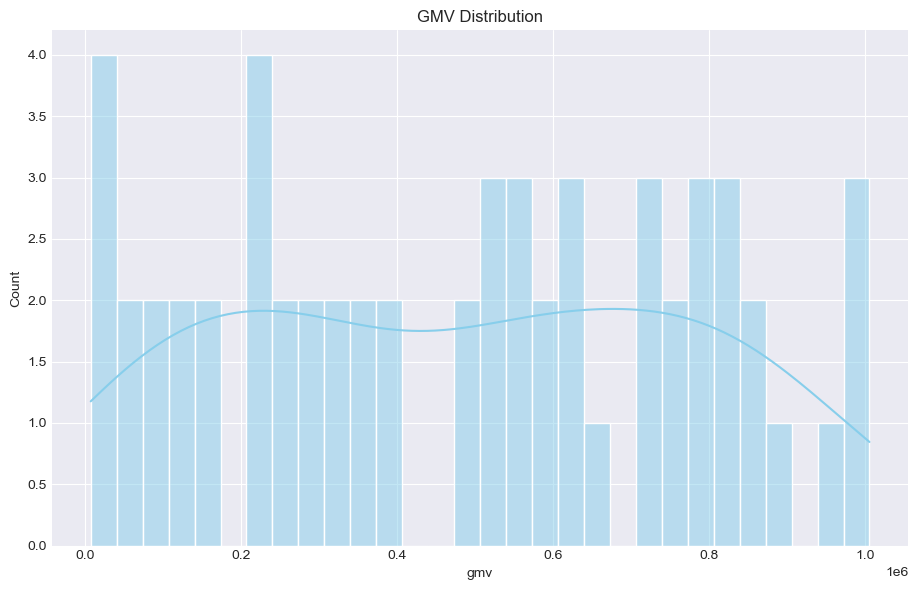

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 可视化数据分布
plt.figure(figsize=(18, 6))

# 示例：可视化测试数据中某一列的分布（例如：gmv）
plt.subplot(1, 2, 1)
sns.histplot(test['gmv'], kde=True, color='skyblue', bins=30)
plt.title('GMV Distribution')

plt.tight_layout()
plt.show()


--- test 数据的相关性矩阵 ---
            requests     trips       gmv  conversion       roi
requests    1.000000  0.999946  0.999781   -0.668848  0.806669
trips       0.999946  1.000000  0.999820   -0.661718  0.803658
gmv         0.999781  0.999820  1.000000   -0.662738  0.807323
conversion -0.668848 -0.661718 -0.662738    1.000000 -0.785600
roi         0.806669  0.803658  0.807323   -0.785600  1.000000


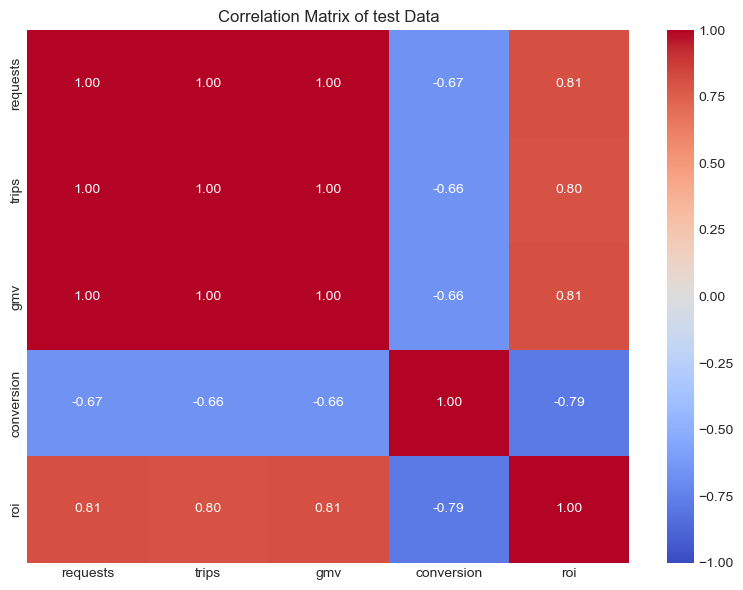

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算 conversion：每单请求的转换率
test['conversion'] = test['trips'] / test['requests'].replace(0, np.nan)

# 计算 ROI：每次配送的回报率
test['roi'] = test['gmv'] / (test['coupon per trip'] * test['trips'])

# 计算相关性矩阵
correlation = test[['requests', 'trips', 'gmv', 'conversion', 'roi']].corr()

# 打印相关性矩阵
print("\n--- test 数据的相关性矩阵 ---")
print(correlation)

# 使用 seaborn 绘制相关性矩阵热图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)

plt.title("Correlation Matrix of test Data")
plt.tight_layout()
plt.show()


## 原始分组，指标提升并不显著

In [62]:
# # 计算 coupon per trip 的中位数
# median_coupon = test['coupon per trip'].median()
# 
# # # 根据 coupon per trip 的中位数重新赋值 group
# test['group'] = np.where(test['coupon per trip'] > median_coupon, 'experiment', 'control')

from scipy import stats as st

def ab_test(metrics):
    # 创建一个空的 DataFrame 用来保存检验结果
    ab_test_results = pd.DataFrame(columns=['Metric', 'Levene Test Statistic', 'Levene p-value', 'T-test Statistic', 'T-test p-value'])

    # 对各个指标进行 A/B 测试
    for metric in metrics:
        # 提取 control 和 experiment 组的数据
        control = test[test['group'] == 'control'][metric].values
        experiment = test[test['group'] == 'experiment'][metric].values

        # 方差齐性检验（Levene检验）
        levene_res = st.levene(control, experiment)

        # 配对 t 检验（独立样本 t 检验）
        t_test_res = st.ttest_ind(control, experiment)

        # 将结果添加到 DataFrame 中
        result = pd.DataFrame({
            'Metric': [metric],
            'Levene Test Statistic': [levene_res.statistic],
            'Levene p-value': [levene_res.pvalue],
            'T-test Statistic': [t_test_res.statistic],
            'T-test p-value': [t_test_res.pvalue]
        })
        
        # 使用 pd.concat 替代 append
        ab_test_results = pd.concat([ab_test_results, result], ignore_index=True)
    
    # 返回包含所有检验结果的 DataFrame
    return ab_test_results

# 定义要进行 A/B 测试的指标
metrics = ['requests', 'gmv', 'coupon per trip', 'trips', 'canceled requests']

# 调用 ab_test 函数并获取结果
ab_test_results = ab_test(metrics)

ab_test_results


,Metric,Levene Test Statistic,Levene p-value,T-test Statistic,T-test p-value
0,requests,0.014685,0.903981,0.021729,0.982741
1,gmv,0.028653,0.866192,0.077286,0.938671
2,coupon per trip,0.009286,0.923576,-0.256917,0.798185
3,trips,0.012407,0.911707,0.009701,0.992294
4,canceled requests,0.041309,0.839679,0.151077,0.880458


## 按照Coupon Per Trip大小进行AB Test分组

In [63]:
# 计算 coupon per trip 的中位数
median_coupon = test['coupon per trip'].median()

# # 根据 coupon per trip 的中位数重新赋值 group
test['group'] = np.where(test['coupon per trip'] > median_coupon, 'experiment', 'control')

# 按照 'group' 分组并计算每个组的均值
test_grouped = test.groupby('group').mean()
test_grouped



# 定义要进行 A/B 测试的指标
metrics = ['requests', 'gmv', 'coupon per trip', 'trips', 'canceled requests']

# 调用 ab_test 函数并获取结果
ab_test_results = ab_test(metrics)

ab_test_results

,Metric,Levene Test Statistic,Levene p-value,T-test Statistic,T-test p-value
0,requests,1.420975,2.382701e-01,7.412829,7.192036e-10
1,gmv,1.476947,2.293517e-01,7.350620,9.113083e-10
2,coupon per trip,57.899196,3.408359e-10,-10.892927,1.881583e-15
3,trips,1.455379,2.327387e-01,7.312791,1.052427e-09
4,canceled requests,0.593283,4.443896e-01,8.075195,5.815896e-11


图表 'gmv_vs_coupon_per_trip.png' 和数据 'gmv_by_coupon_bin.csv' 已保存。


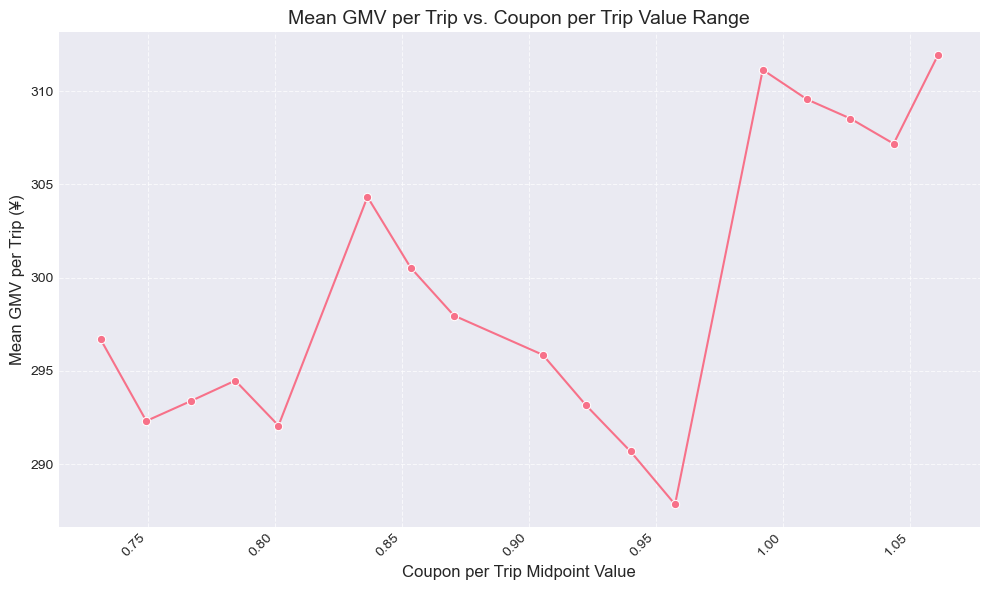

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

TEST_PATH = 'test.xlsx' # 确保这里是您的文件路径
# 确保在运行前已加载 test DataFrame，如下所示：
# test = pd.read_excel(TEST_PATH)
# test.columns = [c.strip().lower() for c in test.columns]
# test.rename(columns={'coupon per trip': 'coupon_per_trip'}, inplace=True)
# ...

# --- 分析步骤 ---

# 1. 计算核心指标：每单 GMV (GMV per Trip)
# 这是衡量优惠券价值与实际收入之间关系的关键指标。
# 使用 .replace(0, np.nan) 避免除零错误
test['gmv_per_trip'] = test['gmv'] / test['trips'].replace(0, np.nan)

# 2. 定义 coupon_per_trip 的分箱
# 使用 pd.cut 将其分成 10 个等宽区间 (Binning)

test['coupon_bin'] = pd.cut(
    test['coupon per trip'],
    bins=20,
    duplicates='drop',
    include_lowest=True
)


# 3. 按照分箱分组并计算 Mean GMV per Trip
gmv_by_coupon = test.groupby('coupon_bin', observed=True).agg(
    mean_gmv_per_trip=('gmv_per_trip', 'mean'),
    count=('date', 'count')
).reset_index()

# 4. 提取分箱的中心点用于绘图的 X 轴
gmv_by_coupon['coupon_midpoint'] = gmv_by_coupon['coupon_bin'].apply(lambda x: x.mid)

# 5. 绘图：Mean GMV per Trip vs. Coupon per Trip Level
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=gmv_by_coupon,
    x='coupon_midpoint',
    y='mean_gmv_per_trip',
    marker='o'
)

plt.title('Mean GMV per Trip vs. Coupon per Trip Value Range', fontsize=14)
plt.xlabel('Coupon per Trip Midpoint Value', fontsize=12)
plt.ylabel('Mean GMV per Trip (¥)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 保存图表和聚合数据
plt.savefig('gmv_vs_coupon_per_trip.png')
gmv_by_coupon.to_csv('gmv_by_coupon_bin.csv', index=False)

print("图表 'gmv_vs_coupon_per_trip.png' 和数据 'gmv_by_coupon_bin.csv' 已保存。")

In [65]:
print(gmv_by_coupon)

        coupon_bin  mean_gmv_per_trip  count coupon_midpoint
0   (0.722, 0.741]         296.698944      9          0.7315
1   (0.741, 0.758]         292.316487      7          0.7495
2   (0.758, 0.776]         293.383837      7          0.7670
3   (0.776, 0.793]         294.481336      7          0.7845
4    (0.793, 0.81]         292.068936      2          0.8015
5   (0.828, 0.845]         304.326034      1          0.8365
6   (0.845, 0.862]         300.533308      4          0.8535
7   (0.862, 0.879]         297.969655      2          0.8705
8   (0.897, 0.914]         295.861054      2          0.9055
9   (0.914, 0.931]         293.155444      2          0.9225
10  (0.931, 0.949]         290.682649      2          0.9400
11  (0.949, 0.966]         287.847222      1          0.9575
12  (0.983, 1.001]         311.139968      1          0.9920
13  (1.001, 1.018]         309.548326      2          1.0095
14  (1.018, 1.035]         308.526144      5          1.0265
15  (1.035, 1.052]      

In [66]:
!jupyter nbconvert --to html main.ipynb

[NbConvertApp] Converting notebook main.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 391374 bytes to main.html
